<a href="https://colab.research.google.com/github/Sinudeshmukh/Data-Science/blob/main/SVM_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv("forestfires.csv")

In [ ]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


#Applying EDA on Dataset

In [ ]:
df.drop(df.columns[[0,1]],axis=1,inplace = True)

In [ ]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [ ]:
df.shape

(517, 29)

###Label Encoding Categorical Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['size_category'] = label_encoder.fit_transform(df.size_category)

In [ ]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [ ]:
df[df.duplicated()]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
100,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
215,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
303,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
426,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
461,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
501,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
508,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df = df.drop_duplicates()

In [ ]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,0.145383,0.161100,0.184676,0.117878,0.123772,0.104126,0.017682,0.349705,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917,0.728880
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,0.352833,0.367985,0.388416,0.322781,0.329645,0.305724,0.131921,0.477346,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466,0.444975
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###From descriptive stats it seems like there are many outliers in dataset

##Outlier Detection

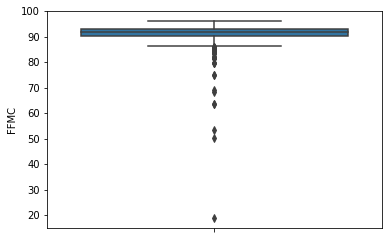

In [ ]:
sns.boxplot(y=df['FFMC'])

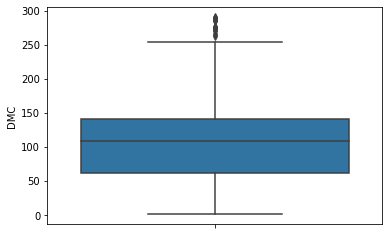

In [ ]:
sns.boxplot(y=df['DMC'])

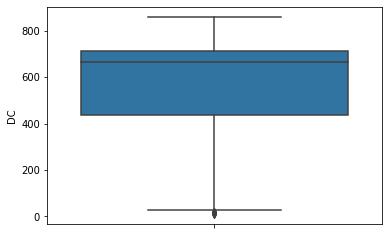

In [ ]:
sns.boxplot(y=df['DC'])

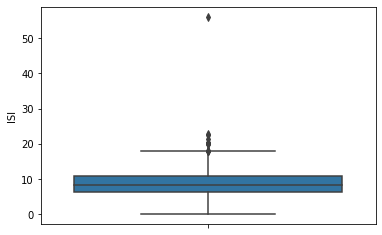

In [ ]:
sns.boxplot(y=df['ISI'])

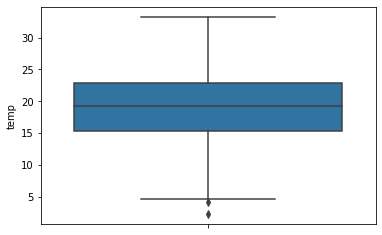

In [ ]:
sns.boxplot(y=df['temp'])

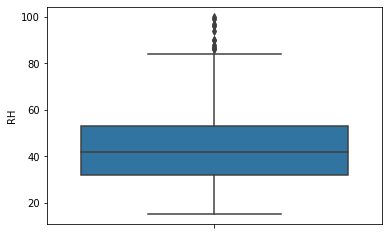

In [ ]:
sns.boxplot(y=df['RH'])

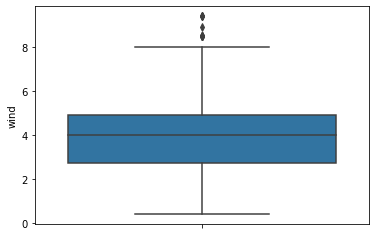

In [ ]:
sns.boxplot(y=df['wind'])

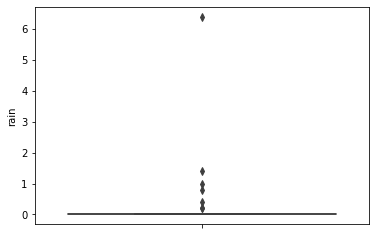

In [ ]:
sns.boxplot(y=df['rain'])

In [ ]:
df.sort_values(by=['FFMC']).head(20)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
312,50.4,46.2,706.6,0.4,12.2,78,6.3,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
299,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
199,63.5,70.8,665.3,0.8,22.6,38,3.6,0.0,11.32,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
130,68.2,21.5,87.2,0.8,15.4,40,2.7,0.0,0.00,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
97,69.0,2.4,15.5,0.7,17.4,24,5.4,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
464,75.1,4.4,16.2,1.9,5.1,77,5.4,0.0,2.14,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
463,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
40,79.5,60.6,366.7,1.5,23.3,37,3.1,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
df = df.drop([379,312,299,12,199,130,97,464,463,40,516,465,176,196,514,239,104])

In [ ]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
511,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.sort_values(by=['DMC']).head(20)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
411,84.6,3.2,43.6,3.3,8.2,53,9.4,0.0,4.62,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
394,84.1,4.6,46.7,2.2,5.3,68,1.8,0.0,0.00,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
284,85.2,4.9,15.8,6.3,7.5,46,8.0,0.0,24.24,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
283,86.9,6.6,18.7,3.2,8.8,35,3.1,0.0,1.10,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
75,84.2,6.8,26.6,7.7,6.7,79,3.1,0.0,0.00,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
410,84.1,7.3,52.8,2.7,14.7,42,2.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
96,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
407,84.7,8.2,55.0,2.9,14.2,46,4.0,0.0,0.00,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
202,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
395,85.0,9.0,56.9,3.5,10.1,62,1.8,0.0,51.78,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop([411,284,394,283,75,410,96,407,202,395,58,390,76,59,466,182,240])

In [ ]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
511,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.sort_values(by=['DMC'],ascending=False).head(20)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
406,87.1,291.3,860.6,4.0,17.0,67,4.9,0.0,3.95,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
444,90.3,290.0,855.3,7.4,16.2,58,3.6,0.0,9.96,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
440,90.3,290.0,855.3,7.4,16.2,58,3.6,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
374,90.3,290.0,855.3,7.4,10.3,78,4.0,0.0,18.30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
408,90.3,290.0,855.3,7.4,19.9,44,3.1,0.0,7.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
430,89.7,287.2,849.3,6.8,19.4,45,3.6,0.0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
448,89.7,284.9,844.0,10.1,10.5,77,4.0,0.0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
369,91.0,276.3,825.1,7.1,13.8,77,7.6,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
462,91.0,276.3,825.1,7.1,14.5,76,7.6,0.0,3.71,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
370,91.0,276.3,825.1,7.1,13.8,77,7.6,0.0,11.06,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df = df.drop([406,374,444,406,440,408,430,448,369,462,370,392,459,384,434,453,454,425,456,437,422])

In [ ]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
511,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.00000,455.000000,455.000000,455.000000,455.000000,455.000000,455.0,455.000000,455.000000,455.000000,455.000000,455.0,455.000000,455.000000,455.000000
mean,91.609011,109.965055,566.868571,9.582198,19.494066,42.591209,3.997143,0.022857,13.847758,0.158242,0.151648,0.156044,0.180220,0.114286,0.12967,0.109890,0.010989,0.369231,0.019780,0.002198,0.0,0.065934,0.032967,0.112088,0.004396,0.0,0.032967,0.349451,0.731868
std,2.499089,51.887010,221.728553,4.443772,5.535360,15.484394,1.771524,0.313297,67.657367,0.365369,0.359075,0.363296,0.384793,0.318508,0.33631,0.313097,0.104366,0.483128,0.139398,0.046881,0.0,0.248440,0.178747,0.315822,0.066226,0.0,0.178747,0.477321,0.443474
min,81.600000,14.600000,25.600000,1.900000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,90.750000,80.900000,488.000000,7.000000,16.400000,32.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,91.800000,108.400000,664.500000,8.700000,19.600000,40.000000,4.000000,0.000000,0.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
75%,93.100000,140.250000,706.700000,11.750000,23.250000,51.000000,4.900000,0.000000,6.575000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000
max,96.200000,248.400000,822.800000,56.100000,33.300000,99.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [ ]:
df.sort_values(by=['ISI']).head(20)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
511,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
275,84.6,26.4,352.0,2.0,5.1,61,4.9,0.0,5.38,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
241,83.0,23.3,85.3,2.3,16.7,20,3.1,0.0,0.00,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
276,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,17.85,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
278,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
279,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
277,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
281,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop([513,512,511,275,241,276,278,279,277,281,110,105,165,181,17,147,123,233,282,304])

In [ ]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,91.0,166.9,752.6,7.1,18.5,73,8.5,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
507,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
509,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
510,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.00000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.0,435.0,435.000000,435.000000,435.000000,435.000000,435.0,435.000000,435.000000,435.000000
mean,91.937931,113.307586,574.164598,9.898391,19.764598,42.652874,3.937471,0.023908,13.874184,0.158621,0.144828,0.16092,0.179310,0.114943,0.126437,0.114943,0.009195,0.379310,0.006897,0.0,0.0,0.068966,0.034483,0.110345,0.002299,0.0,0.029885,0.358621,0.737931
std,1.995574,50.445887,218.234413,4.285596,5.211547,15.245199,1.731664,0.320395,68.993175,0.365743,0.352332,0.36788,0.384054,0.319320,0.332724,0.319320,0.095561,0.485774,0.082854,0.0,0.0,0.253687,0.182676,0.313680,0.047946,0.0,0.170466,0.480148,0.440266
min,84.000000,14.600000,25.600000,3.700000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,91.000000,85.100000,529.800000,7.100000,16.800000,32.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,92.000000,111.200000,666.700000,8.900000,19.800000,40.000000,4.000000,0.000000,0.610000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
75%,93.100000,141.300000,711.450000,12.000000,23.300000,51.000000,4.900000,0.000000,6.485000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000
max,96.200000,248.400000,822.800000,56.100000,33.300000,99.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [ ]:
df.sort_values(['rain'],ascending=False).head(10)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
499,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
509,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
243,91.8,175.1,700.7,13.8,21.9,73,7.6,1.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
500,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
502,96.1,181.1,671.2,14.3,20.7,69,4.9,0.4,0.00,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
286,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2,0.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
333,92.1,87.7,721.1,9.5,18.1,54,3.1,0.0,2.13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
329,92.2,102.3,751.5,8.4,23.5,27,4.0,0.0,3.33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
df = df.drop([499,509,243,500,502,286,3])

In [ ]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,91.0,163.2,744.4,10.1,26.7,35,1.8,0.0,5.80,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
506,91.0,166.9,752.6,7.1,18.5,73,8.5,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
507,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
510,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.sort_values(['area'],ascending=False).head(10)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
238,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
415,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
479,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
237,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
236,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
235,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
420,91.7,191.4,635.9,7.8,26.2,36,4.5,0.0,185.76,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
377,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
234,92.5,121.1,674.4,8.6,17.7,25,3.1,0.0,154.88,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
232,91.0,129.5,692.6,7.0,18.7,43,2.7,0.0,103.39,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df = df.drop([238,415,479])

In [ ]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,91.0,163.2,744.4,10.1,26.7,35,1.8,0.0,5.80,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
506,91.0,166.9,752.6,7.1,18.5,73,8.5,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
507,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
510,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.0,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.0,425.0,425.000000,425.000000,425.000000,425.000000,425.0,425.000000,425.000000,425.000000
mean,91.911765,112.328706,574.058588,9.862588,19.738588,42.152941,3.900000,0.0,9.192071,0.157647,0.145882,0.162353,0.181176,0.115294,0.122353,0.115294,0.009412,0.374118,0.007059,0.0,0.0,0.065882,0.035294,0.110588,0.002353,0.0,0.030588,0.364706,0.741176
std,1.977802,50.005426,218.714832,4.303288,5.194511,14.693332,1.721082,0.0,26.113106,0.364839,0.353404,0.369209,0.385618,0.319753,0.328079,0.319753,0.096670,0.484465,0.083818,0.0,0.0,0.248369,0.184740,0.313991,0.048507,0.0,0.172402,0.481915,0.438505
min,84.000000,14.600000,25.600000,3.700000,2.200000,15.000000,0.400000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,91.000000,85.100000,529.800000,7.100000,16.800000,32.000000,2.700000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,92.000000,111.200000,666.700000,8.900000,19.700000,40.000000,4.000000,0.0,0.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
75%,93.100000,141.100000,713.900000,11.900000,23.300000,50.000000,4.900000,0.0,6.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000
max,96.200000,248.400000,822.800000,56.100000,33.300000,99.000000,9.400000,0.0,212.880000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


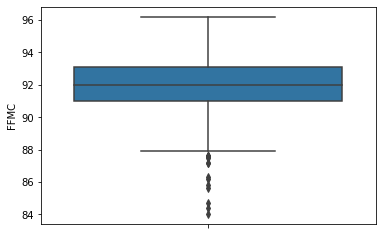

In [ ]:
ax = sns.boxplot(y=df['FFMC'])

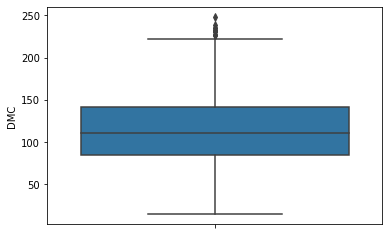

In [ ]:
ax = sns.boxplot(y=df['DMC'])

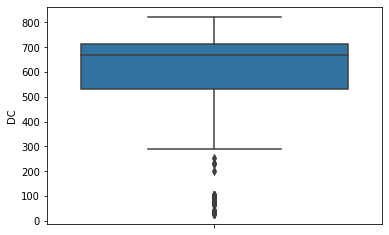

In [ ]:
ax = sns.boxplot(y=df['DC'])

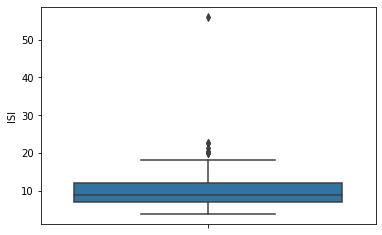

In [ ]:
ax = sns.boxplot(y=df['ISI'])

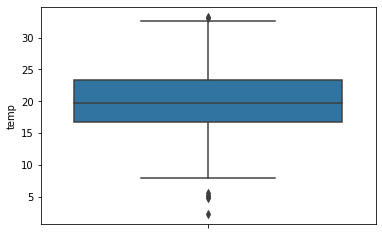

In [ ]:
ax = sns.boxplot(y=df['temp'])

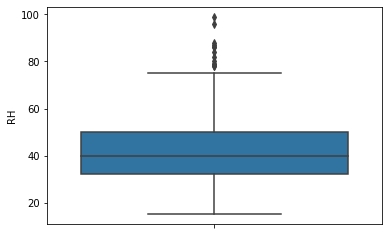

In [ ]:
ax = sns.boxplot(y=df['RH'])

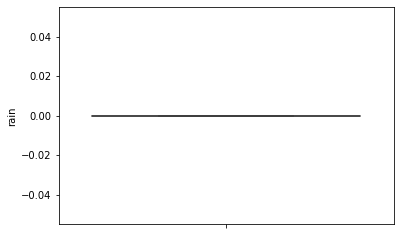

In [ ]:
ax = sns.boxplot(y=df['rain'])

##All the otliers are removed from Dataset so It Seems like Dataset is ready for Model Building

In [ ]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,91.0,163.2,744.4,10.1,26.7,35,1.8,0.0,5.80,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
506,91.0,166.9,752.6,7.1,18.5,73,8.5,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
507,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
510,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


##Assigning X and Y Variables

In [ ]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

# **Model Building**

##Grid Search cv for best Hyperparameters

In [ ]:
model = SVC()
param_grid = [{'kernel':['rbf','poly'],'gamma':[50,10,5,1],'C':[10,5,1,0.1,0.01]}]
grid = GridSearchCV(model,param_grid,cv=10)
grid.fit(X,Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [10, 5, 1, 0.1, 0.01], 'gamma': [50, 10, 5, 1],
                          'kernel': ['rbf', 'poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.best_score_

0.9786821705426357

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 50, 'kernel': 'poly'}

#Model Building with Best Parameters

In [ ]:
model1 = SVC(C=10,kernel='poly',gamma=50)
model1.fit(X,Y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
accuracy = cross_val_score(model1,X,Y,cv=10)

In [ ]:
print(accuracy.mean()*100)

97.86821705426357
